¡Hola Estela! Como te va?

Mi nombre es Emanuel Fitta! Un gusto conocerte, seré tu revisor en este proyecto.

A continuación un poco sobre la modalidad de revisión que usaremos:

Cuando enccuentro un error por primera vez, simplemente lo señalaré, te dejaré encontrarlo y arreglarlo tú cuenta. Además, a lo largo del texto iré haciendo algunas observaciones sobre mejora en tu código y también haré comentarios sobre tus percepciones sobre el tema. Pero si aún no puedes realizar esta tarea, te daré una pista más precisa en la próxima iteración y también algunos ejemplos prácticos. Estaré abierto a comentarios y discusiones sobre el tema.

Encontrará mis comentarios a continuación: **no los mueva, modifique ni elimine**.

Puedes encontrar mis comentarios en cuadros verdes, amarillos o rojos como este:

<div class="alert alert-block alert-success">
<b>Comentario del revisor.</b> <a class="tocSkip"></a>

Exito. Todo se ha hecho de forma exitosa.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor.</b> <a class="tocSkip"></a>

Observación. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">

<b>Comentario del revisor.</b> <a class="tocSkip"></a>

Necesita arreglos. Este apartado necesita algunas correcciones. El trabajo no puede ser aceptado con comentarios rojos. 
</div>

Puedes responder utilizando esto:

<div class="alert alert-block alert-info">
<b>Respuesta de estudiante.</b> <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-success">
<b>Review General. (Iteración 3) </b> <a class="tocSkip"></a>

Muy bien Estela! Ahora se ve mucho mejor. Veo que has realizado todos los cambios, te felicito por eso.
    
Te deseo mucho éxito en tu carrera profesional! Vas por un muy buen camino!

<div class="alert alert-block alert-warning">
<b>Review General. (Iteración 2) </b> <a class="tocSkip"></a>

Veo que atendiste muchas de las sugerencias que te coloqué, te agradezco por ello, se nota el esfuerzo que estás poniendo en el trabajo. Aún hay algunos detalles que te he colocado, muchos de estos tienen que ver con los nuevos gráficos que has agregado. Así como el último test en donde estás obteniendo un valor nulo como pval, lo que probablemente significa que algo no se realizó de manera correcta. Se que puede ser complicado esto, pero por favor, te pido paciencia, lo estás haciendo muy bien. 

<div class="alert alert-block alert-warning">
<b>Review General. (Iteración 1) </b> <a class="tocSkip"></a>

Antes que nada Estela, quiero darte la bienvenida a este mundo de los datos y de los análisis. También quiero felicitarte porque realmente hiciste un gran trabajo, se puede notar que estás adquiriendo las habilidades necesarias para ser una gran análista.
    
Por otro lado hay algunos detalles que quisiera recomendarte hacer y que pienso pueden aportarte mucho en tu carrera profesional. Estas observaciones las irás encontrando a lo largo del notebook.
    
No te preocupes, se que podría ser abrumador, pero estamos aquí para apoyarte y si tienes alguna duda, comentalo en tu siguiente respuesta e intentaré apoyarte. 

# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

## Inicialización

In [1]:
from scipy import stats as st
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt



## Cargar datos

In [2]:
calls = pd.read_csv('/datasets/megaline_calls.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv') 
messages = pd.read_csv('/datasets/megaline_messages.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')
users = pd.read_csv('/datasets/megaline_users.csv')
    


<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 1) </b> <a class="tocSkip"></a>

Bien! Dado que las columnas están separadas por comma, no es necesario especificar un separador en el parámetro sep de pd.read_csv.

## Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

## Tarifas

In [3]:
plans.info()

plans.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000
max,1000.000000,30720.000000,3000.000000,70.000000,10.00000,0.030000,0.030000


In [4]:
print(plans.head())# Imprime una muestra de los datos para las tarifas



   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

Este dataframe nos da la información de los planes que ofrece la empresa. Podemos ver que el dataframe esta completo. no tiene valores nulos y casi todos sus valores son entros excepto los precios de minuto y mensajes que llevan decimales, ya que son centavos 

<div class="alert alert-block alert-warning">
<b>Comentario del revisor. (Iteración 1) </b> <a class="tocSkip"></a>

Ooops Estela, creo que por acá se te fue responder estas preguntas. Es un detalle, a todos nos pasa! Pero ten cuidado en futuros análisis. Es importante responderlas, pues con ellas profundizamos en el aprendizaje.

## Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [5]:
plans.duplicated().sum()
#no hay valores duplicados ni ausentes

0

<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 1) </b> <a class="tocSkip"></a>

Muy bien! Con esto te aseguras que no existan valores duplicados.

## Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [6]:
#convertir los datos float a enteros, ya que la compania redondea las tarifas a números enteros. No hay valores ausentes y tampoco duplicados
plans['usd_per_message'] = np.ceil(plans['usd_per_message']).round().astype(int)
print(plans['usd_per_message'])
plans['usd_per_minute'] = np.ceil(plans['usd_per_minute']).round().astype(int)
print(plans['usd_per_minute'])

0    1
1    1
Name: usd_per_message, dtype: int64
0    1
1    1
Name: usd_per_minute, dtype: int64


<div class="alert alert-block alert-warning">
<b>Comentario del revisor. (Iteración 1) </b> <a class="tocSkip"></a>

Cuidado Estela! Esto tal vez no resulte tan efectivo. Como puedes ver con esto obtienes que el costo por mensaje y el costo por minuto de los dos únicos planes es de 1 usd. En este caso, lo mejor tal vez, sería dejarlo como se encuentran originalmente. Pero por ejemplo ¿Qué opinas de transformar de mb a gb? 
    
<div class="alert alert-block alert-info">
<b>El redondeo lo hice ya que en las indicaciones inciales dice que los precios se cobran en enteros. PO rejemplo, si usaba 3.23 min, se redondea y se lo cobraría los 4 min. Y la conversión de mg a gb la hice en el dataframe de internet en el que también hice el redonde por la misma razón.</b> <a class="tocSkip"></a>
</div>

## Usuarios/as

In [7]:
users.info()
users.describe() # Imprime la información general/resumida sobre el DataFrame de usuarios



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


In [8]:
users.head(20)# Imprime una muestra de datos para usuarios



,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

hay valores ausentes en la columna de churn_date, hay que rellenar los valores ausentes
es necesario revisar si hay duplicados que revisar si hay duplicados

<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 1) </b> <a class="tocSkip"></a>

Muy buena observación! Es importante decidir que haremos con los valores nulos. Te felicito por esa anotación:

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [9]:
users.duplicated().sum()



0

<div class="alert alert-block alert-warning">
<b>Comentario del revisor. (Iteración 1) </b> <a class="tocSkip"></a>

Mira Estela, con lo que muestras aquí, te aseguras de que no existan duplicados. Muy bien por eso! Pero que tal si por acá hacemos lo siguiente: cambiar a formato fecha las columnas con este tipo de dato? 
    
<div class="alert alert-block alert-info">
<b>la modificación de la fecha la hice en la siguiente celda.</b> <a class="tocSkip"></a>
</div>

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [10]:
users['churn_date'] = pd.to_datetime(users['churn_date'], errors='coerce')
print(users['churn_date'])

0     NaT
1     NaT
2     NaT
3     NaT
4     NaT
       ..
495   NaT
496   NaT
497   NaT
498   NaT
499   NaT
Name: churn_date, Length: 500, dtype: datetime64[ns]


## Llamadas

In [11]:
calls.info()
calls.describe()# Imprime la información general/resumida sobre el DataFrame de las llamadas



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


In [12]:
calls.head(20)# Imprime una muestra de datos para las llamadas



,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
5,1000_388,1000,2018-12-31,2.20
6,1000_510,1000,2018-12-27,5.75
7,1000_521,1000,2018-12-28,14.18
8,1000_530,1000,2018-12-28,5.77
9,1000_544,1000,2018-12-26,4.40


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

No se encuentra ningún dato ausente, hay que revisar si hay duplicados y redondear la duración de llamadas a enteros

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [13]:
calls['call_date'] = pd.to_datetime(calls['call_date'], errors='coerce')
print(calls['call_date'])

0        2018-12-27
1        2018-12-27
2        2018-12-27
3        2018-12-28
4        2018-12-30
            ...    
137730   2018-11-21
137731   2018-10-20
137732   2018-09-21
137733   2018-10-10
137734   2018-12-29
Name: call_date, Length: 137735, dtype: datetime64[ns]


<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 2) </b> <a class="tocSkip"></a>

Muy bien! 

<div class="alert alert-block alert-warning">
<b>Comentario del revisor. (Iteración 1) </b> <a class="tocSkip"></a>

Mira Estela, con lo que muestras aquí, te aseguras de que no existan duplicados. Muy bien por eso! Pero que tal si por acá hacemos lo siguiente: cambiar a formato fecha las columnas con este tipo de dato? 

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [14]:
calls['duration'] = np.ceil(calls['duration']).round().astype(int)
print(calls['duration'])

0          9
1         14
2         15
3          6
4          5
          ..
137730     9
137731    11
137732     9
137733     1
137734    14
Name: duration, Length: 137735, dtype: int64


In [15]:
calls['call_date'] = pd.to_datetime(calls['call_date'])
calls['month'] = calls['call_date'].dt.month

<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 1) </b> <a class="tocSkip"></a>

Muy bien Estela! En este caso es mucho más adecuado realizar el redondeo! 

## Mensajes

In [16]:
messages.info()
messages.describe() # Imprime la información general/resumida sobre el DataFrame de los mensajes



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000


In [17]:
messages.head(20)# Imprime una muestra de datos para los mensajes



,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
5,1000_346,1000,2018-12-29
6,1000_386,1000,2018-12-30
7,1000_413,1000,2018-12-31
8,1000_502,1000,2018-12-27
9,1000_525,1000,2018-12-28


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]


solo hay que revisar que no haya duplicados y ordenalos por fecha 

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [18]:
messages['message_date'] = pd.to_datetime(messages['message_date'], errors='coerce')
print(messages['message_date'])

0       2018-12-27
1       2018-12-31
2       2018-12-31
3       2018-12-27
4       2018-12-26
           ...    
76046   2018-12-24
76047   2018-12-24
76048   2018-12-31
76049   2018-12-24
76050   2018-12-23
Name: message_date, Length: 76051, dtype: datetime64[ns]


<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 2) </b> <a class="tocSkip"></a>

Excelente Estela!

<div class="alert alert-block alert-warning">
<b>Comentario del revisor. (Iteración 1) </b> <a class="tocSkip"></a>

Mira Estela, con lo que muestras aquí, te aseguras de que no existan duplicados. Muy bien por eso! Pero que tal si por acá hacemos lo siguiente: cambiar a formato fecha las columnas con este tipo de dato? 

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [19]:
messages['message_date'] = pd.to_datetime(messages['message_date']).sort_values(ascending=False)
print(messages['message_date'])

0       2018-12-27
1       2018-12-31
2       2018-12-31
3       2018-12-27
4       2018-12-26
           ...    
76046   2018-12-24
76047   2018-12-24
76048   2018-12-31
76049   2018-12-24
76050   2018-12-23
Name: message_date, Length: 76051, dtype: datetime64[ns]


In [20]:
messages['message_date'] = pd.to_datetime(messages['message_date'])
messages['month'] = messages['message_date'].dt.month

<div class="alert alert-block alert-warning">
<b>Comentario del revisor. (Iteración 1) </b> <a class="tocSkip"></a>

Es una buena idea! Ordenar los datos por la fecha puede facilitar las visualizaciones en muchos casos. Sin embargo, toma en cuenta, que esto no cambia la estrucura de los datos.

## Internet

In [21]:
internet.info()
internet.describe() # Imprime la información general/resumida sobre el DataFrame de internet



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


In [22]:
internet.head(20)# Imprime una muestra de datos para el tráfico de internet



,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
5,1001_0,1001,2018-08-24,284.68
6,1001_3,1001,2018-12-09,656.04
7,1001_4,1001,2018-11-04,16.97
8,1001_10,1001,2018-11-27,135.18
9,1001_15,1001,2018-12-13,761.92



[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

Al igual que en los dataframes anteriores, hay que revisar que no existan valores duplicados, en la info ya se puede observar que no hay valores ausentes y que el tipo de datos esta correcto, lo unico que hay que modificar es la columna de mb_used, de megabytes a gigabytes. esto lo haremos dividiendo los datos de esa columnsa por 1024. ya que 1gb = 1024 mb

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [23]:
internet['session_date'] = pd.to_datetime(internet['session_date'], errors='coerce')
print(internet['session_date'])

0        2018-12-29
1        2018-12-31
2        2018-12-28
3        2018-12-26
4        2018-12-27
            ...    
104820   2018-10-20
104821   2018-12-30
104822   2018-09-22
104823   2018-12-07
104824   2018-12-24
Name: session_date, Length: 104825, dtype: datetime64[ns]


<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 2) </b> <a class="tocSkip"></a>

Perfecto!

<div class="alert alert-block alert-warning">
<b>Comentario del revisor. (Iteración 1) </b> <a class="tocSkip"></a>

Mira Estela, con lo que muestras aquí, te aseguras de que no existan duplicados. Muy bien por eso! Pero que tal si por acá hacemos lo siguiente: cambiar a formato fecha las columnas con este tipo de dato? 

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [24]:
internet['gb_used'] = np.ceil(internet['mb_used'] / 1024).round().astype(int)
print(internet['gb_used'])


0         1
1         0
2         1
3         1
4         1
         ..
104820    1
104821    1
104822    1
104823    0
104824    1
Name: gb_used, Length: 104825, dtype: int64


In [25]:
internet['session_date'] = pd.to_datetime(internet['session_date'])
internet['month'] = internet['session_date'].dt.month

<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 2) </b> <a class="tocSkip"></a>



<div class="alert alert-block alert-warning">
<b>Comentario del revisor. (Iteración 1) </b> <a class="tocSkip"></a>

Ten cuidado con esto, no siempre es adecuado redondear, pues puedes perder variabilidad en tus datos. Además por acá redondeas y vuelves a redondear. Te recomiendo observar tus datos y si la naturaleza de los datos se da para redondear adelante. Pero si vas perdiendo variabilidad, es mejor no hacerlo.

## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [26]:
print('Plan Surf')
print('pago mensual $20') 
print('500 min al mes, 50 SMS, 15Gb') 
print('si se esceden:1 min = 3 cent, 1 SMS = 3cent, 1GB = $10') 
print()
print('Plan Ultimate')
print('pago mensual $70') 
print('3000 min al mes, 1000 SMS, 30Gb') 
print('si se esceden:1 min =  1 cent, 1 SMS = 1cent, 1GB = $7') 
print()

      # Imprime las condiciones de la tarifa y asegúrate de que te quedan claras 



Plan Surf
pago mensual $20
500 min al mes, 50 SMS, 15Gb
si se esceden:1 min = 3 cent, 1 SMS = 3cent, 1GB = $10

Plan Ultimate
pago mensual $70
3000 min al mes, 1000 SMS, 30Gb
si se esceden:1 min =  1 cent, 1 SMS = 1cent, 1GB = $7



## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [27]:


# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.



<div class="alert alert-block alert-warning">
<b>Comentario del revisor. (Iteración 1) </b> <a class="tocSkip"></a>

Perfecto! Pero mira, esto puedes agregarlo a la parte anterior en la sección de enriquecer los datos, pues acá si que estas transformando los datos estructuralmente al agregar nuevas columnas.

In [28]:
calls_by_user = calls.groupby(['user_id', 'month'])['id'].count().reset_index()
print(calls_by_user)

      user_id  month  id
0        1000     12  16
1        1001      8  27
2        1001      9  49
3        1001     10  65
4        1001     11  64
...       ...    ...  ..
2253     1498     12  39
2254     1499      9  41
2255     1499     10  53
2256     1499     11  45
2257     1499     12  65

[2258 rows x 3 columns]


In [29]:
min_by_user = calls.groupby(['user_id', 'month'])['duration'].sum().reset_index()
print(min_by_user)# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.



      user_id  month  duration
0        1000     12       124
1        1001      8       182
2        1001      9       315
3        1001     10       393
4        1001     11       426
...       ...    ...       ...
2253     1498     12       339
2254     1499      9       346
2255     1499     10       385
2256     1499     11       308
2257     1499     12       496

[2258 rows x 3 columns]


In [30]:
messages

,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12
...,...,...,...,...
76046,1497_526,1497,2018-12-24,12
76047,1497_536,1497,2018-12-24,12
76048,1497_547,1497,2018-12-31,12
76049,1497_558,1497,2018-12-24,12


<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 1) </b> <a class="tocSkip"></a>

Perfecto! Hasta acá haces un buen uso de la agrupación para resolver el problema que se plantea! 

In [31]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.



<div class="alert alert-block alert-warning">
<b>Comentario del revisor. (Iteración 1) </b> <a class="tocSkip"></a>

Perfecto! Pero mira, esto puedes agregarlo a la parte anterior en la sección de enriquecer los datos, pues acá si que estas transformando los datos estructuralmente al agregar nuevas columnas.

In [32]:

messages_by_user = messages.groupby(['user_id', 'month'])['id'].count().reset_index()
print(messages_by_user)

      user_id  month  id
0        1000     12  11
1        1001      8  30
2        1001      9  44
3        1001     10  53
4        1001     11  36
...       ...    ...  ..
1801     1496      9  21
1802     1496     10  18
1803     1496     11  13
1804     1496     12  11
1805     1497     12  50

[1806 rows x 3 columns]


<div class="alert alert-block alert-warning">
<b>Comentario del revisor. (Iteración 1) </b> <a class="tocSkip"></a>

Perfecto! Pero mira, esto puedes agregarlo a la parte anterior en la sección de enriquecer los datos, pues acá si que estas transformando los datos estructuralmente al agregar nuevas columnas.

In [33]:
internet_by_user = internet.groupby(['user_id', 'month'])['mb_used'].sum().reset_index()
print(internet_by_user)# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.



      user_id  month   mb_used
0        1000     12   1901.47
1        1001      8   6919.15
2        1001      9  13314.82
3        1001     10  22330.49
4        1001     11  18504.30
...       ...    ...       ...
2272     1498     12  23137.69
2273     1499      9  12984.76
2274     1499     10  19492.43
2275     1499     11  16813.83
2276     1499     12  22059.21

[2277 rows x 3 columns]


In [34]:
internet

,id,user_id,session_date,mb_used,gb_used,month
0,1000_13,1000,2018-12-29,89.86,1,12
1,1000_204,1000,2018-12-31,0.00,0,12
2,1000_379,1000,2018-12-28,660.40,1,12
3,1000_413,1000,2018-12-26,270.99,1,12
4,1000_442,1000,2018-12-27,880.22,1,12
...,...,...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06,1,10
104821,1499_216,1499,2018-12-30,304.72,1,12
104822,1499_217,1499,2018-09-22,292.75,1,9
104823,1499_218,1499,2018-12-07,0.00,0,12


<div class="alert alert-block alert-warning">
<b>Comentario del revisor. (Iteración 1) </b> <a class="tocSkip"></a>

Muchas felicidades Estela! Manejas muy bien el uso de las agrupaciones para resolver los problemas, solo te recomiendo colocar las transformaciones en la sección correspondiente para tener un código más organizado.

[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [35]:
first_merge= pd.merge(calls_by_user, min_by_user, on = ['user_id', 'month'], how='inner')# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
print(first_merge)


      user_id  month  id  duration
0        1000     12  16       124
1        1001      8  27       182
2        1001      9  49       315
3        1001     10  65       393
4        1001     11  64       426
...       ...    ...  ..       ...
2253     1498     12  39       339
2254     1499      9  41       346
2255     1499     10  53       385
2256     1499     11  45       308
2257     1499     12  65       496

[2258 rows x 4 columns]


In [36]:
second_merge= pd.merge(first_merge, messages_by_user, on = ['user_id', 'month'], how='inner')# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
print(second_merge)

      user_id  month  id_x  duration  id_y
0        1000     12    16       124    11
1        1001      8    27       182    30
2        1001      9    49       315    44
3        1001     10    65       393    53
4        1001     11    64       426    36
...       ...    ...   ...       ...   ...
1768     1496      9    52       414    21
1769     1496     10    46       317    18
1770     1496     11    39       308    13
1771     1496     12    40       294    11
1772     1497     12    54       300    50

[1773 rows x 5 columns]


In [37]:
third_merge = pd.merge(second_merge, internet_by_user, on = ['user_id', 'month'], how='inner')# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
print(third_merge)

      user_id  month  id_x  duration  id_y   mb_used
0        1000     12    16       124    11   1901.47
1        1001      8    27       182    30   6919.15
2        1001      9    49       315    44  13314.82
3        1001     10    65       393    53  22330.49
4        1001     11    64       426    36  18504.30
...       ...    ...   ...       ...   ...       ...
1754     1496      9    52       414    21  16389.27
1755     1496     10    46       317    18  14287.36
1756     1496     11    39       308    13   8547.36
1757     1496     12    40       294    11  16438.99
1758     1497     12    54       300    50  11106.55

[1759 rows x 6 columns]


In [38]:
users['reg_date'] = pd.to_datetime(users['reg_date'])
users['month'] = users['reg_date'].dt.month

<div class="alert alert-block alert-warning">
<b>Comentario del revisor. (Iteración 1) </b> <a class="tocSkip"></a>

Perfecto! Pero mira, esto puedes agregarlo a la parte anterior en la sección de enriquecer los datos, pues acá si que estas transformando los datos estructuralmente al agregar nuevas columnas.

In [39]:
users_plan = users.groupby(['user_id', 'month'])['plan'].sum().reset_index()
print(users_plan)

     user_id  month      plan
0       1000     12  ultimate
1       1001      8      surf
2       1002     10      surf
3       1003      1      surf
4       1004      5      surf
..       ...    ...       ...
495     1495      9      surf
496     1496      2      surf
497     1497     12  ultimate
498     1498      2      surf
499     1499      5      surf

[500 rows x 3 columns]


In [40]:
plan_type = pd.merge(third_merge, users_plan, on = ['user_id', 'month'], how='inner')# Añade la información de la tarifa
print(plan_type)


     user_id  month  id_x  duration  id_y   mb_used      plan
0       1000     12    16       124    11   1901.47  ultimate
1       1001      8    27       182    30   6919.15      surf
2       1002     10    11        59    15   6552.01      surf
3       1004      5    21       193     7   6547.21      surf
4       1006     11     2        10    15   2068.37  ultimate
..       ...    ...   ...       ...   ...       ...       ...
181     1479     11    83       574     1   4123.18      surf
182     1480     12    70       541    51   8805.51      surf
183     1481     12     6        36     3   1265.78      surf
184     1486     12    45       347    10  20312.83      surf
185     1497     12    54       300    50  11106.55  ultimate

[186 rows x 7 columns]


In [41]:
plan = pd.merge(plan_type, plans, left_on = 'plan', right_on= 'plan_name', how='inner')# Añade la información de la tarifa
plan



,user_id,month,id_x,duration,id_y,mb_used,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,1000,12,16,124,11,1901.47,ultimate,1000,30720,3000,70,7,1,1,ultimate
1,1006,11,2,10,15,2068.37,ultimate,1000,30720,3000,70,7,1,1,ultimate
2,1013,12,35,219,16,20113.92,ultimate,1000,30720,3000,70,7,1,1,ultimate
3,1026,7,23,163,9,4822.35,ultimate,1000,30720,3000,70,7,1,1,ultimate
4,1031,7,36,304,1,10653.04,ultimate,1000,30720,3000,70,7,1,1,ultimate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,1474,8,11,96,6,5336.52,surf,50,15360,500,20,10,1,1,surf
182,1479,11,83,574,1,4123.18,surf,50,15360,500,20,10,1,1,surf
183,1480,12,70,541,51,8805.51,surf,50,15360,500,20,10,1,1,surf
184,1481,12,6,36,3,1265.78,surf,50,15360,500,20,10,1,1,surf


<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 1) </b> <a class="tocSkip"></a>

Excelente! Se nota que tienes un buen manejo del uso de la función merge para unir dataframes! Te felicito por ello!

[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [42]:
def calcular_ingresos(row):
    
    if row['plan'] == 'surf':
        ingresos = 20 
        
        if row['duration'] > 500:
           ingresos = (row['duration'] - 500) * .03 + ingresos
        
        if row['id_y'] > 50:
            ingresos = (row['id_y'] - 50) * .03 + ingresos
        
        if row['mb_used'] > 15:
            ingresos = (row['mb_used'] - 15) * 10 + ingresos
            
    if row['plan'] == 'ultimate':
        ingresos = 70 
        
        if row['duration'] > 3000:
           ingresos = (row['duration'] - 3000) * .01 + ingresos
        
        if row['id_y'] > 1000:
            ingresos = (row['id_y'] - 1000) * .01 + ingresos
        
        if row['mb_used'] > 30:
            ingresos = (row['mb_used'] - 30) * 7 + ingresos
            
   
    row['incomes'] = ingresos
    return row

incomes_by_user = plan.apply(calcular_ingresos, axis=1)
incomes_by_user


,user_id,month,id_x,duration,id_y,mb_used,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,incomes
0,1000,12,16,124,11,1901.47,ultimate,1000,30720,3000,70,7,1,1,ultimate,13170.29
1,1006,11,2,10,15,2068.37,ultimate,1000,30720,3000,70,7,1,1,ultimate,14338.59
2,1013,12,35,219,16,20113.92,ultimate,1000,30720,3000,70,7,1,1,ultimate,140657.44
3,1026,7,23,163,9,4822.35,ultimate,1000,30720,3000,70,7,1,1,ultimate,33616.45
4,1031,7,36,304,1,10653.04,ultimate,1000,30720,3000,70,7,1,1,ultimate,74431.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,1474,8,11,96,6,5336.52,surf,50,15360,500,20,10,1,1,surf,53235.20
182,1479,11,83,574,1,4123.18,surf,50,15360,500,20,10,1,1,surf,41104.02
183,1480,12,70,541,51,8805.51,surf,50,15360,500,20,10,1,1,surf,87926.36
184,1481,12,6,36,3,1265.78,surf,50,15360,500,20,10,1,1,surf,12527.80


<div class="alert alert-block alert-warning">
<b>Comentario del revisor. (Iteración 1) </b> <a class="tocSkip"></a>

Ten cuidado aquí Estela. Te recomiendo leer con cuidado las instrucciones. Justo ahí se encuentra el secreto de como resolver este punto. Mira: 
    
    resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas
    
Con esto puedes resolver este punto, no te preocupes, entiendo que puede no resultar sencillo, pero es parte del aprendizaje y del crecimiento superar problemas dificiles. 

</div>


In [43]:
  # Calcula el ingreso mensual para cada usuario



<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 3) </b> <a class="tocSkip"></a>

De acuerdo!

<div class="alert alert-block alert-danger">
<b>Comentario del revisor. (Iteración 2) </b> <a class="tocSkip"></a>
</div>

Me parece que este punto no lo viste Estela
    
<div class="alert alert-block alert-info">
<b>si, le habia dejado un comentario, ya se hizo la multiplicación y la resta como lo piden las intrucciones, incluso lo revisé con una asesora y parece que está bien.</b> <a class="tocSkip"></a>
</div>
    

<div class="alert alert-block alert-warning">
<b>Comentario del revisor. (Iteración 1) </b> <a class="tocSkip"></a>

Ooops! Parece que se te pasó resolver este punto. Una vez que hagas el punto pasado este y la habilidad que tienes de agrupación harán que sea mucho más sencillo.

## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

In [44]:
surf = incomes_by_user[incomes_by_user['plan'] == 'surf']# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.

ultimate = incomes_by_user[incomes_by_user['plan'] == 'ultimate']# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.

mean_s = surf.groupby(['month'])['duration'].mean().reset_index()
mean_s

mean_u = ultimate.groupby(['month'])['duration'].mean().reset_index()
mean_u.drop(['month'], axis=1, inplace=True)
mean_u

mean = pd.concat([mean_s, mean_u], axis=1)
mean.columns=['month', 'surf', 'ultimate']
mean

,month,surf,ultimate
0,1,292.000000,197.666667
1,2,134.000000,90.000000
2,3,263.800000,215.400000
3,4,280.181818,187.750000
4,5,150.200000,295.900000
5,6,173.625000,136.000000
6,7,196.300000,287.200000
7,8,227.357143,378.333333
8,9,172.545455,333.285714
9,10,227.727273,169.333333


<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 2) </b> <a class="tocSkip"></a>

Perfecto!

<div class="alert alert-block alert-warning">
<b>Comentario del revisor. (Iteración 1) </b> <a class="tocSkip"></a>

Creo que aquí querías llamar al dataframe incomes_by_user que definiste atrás.

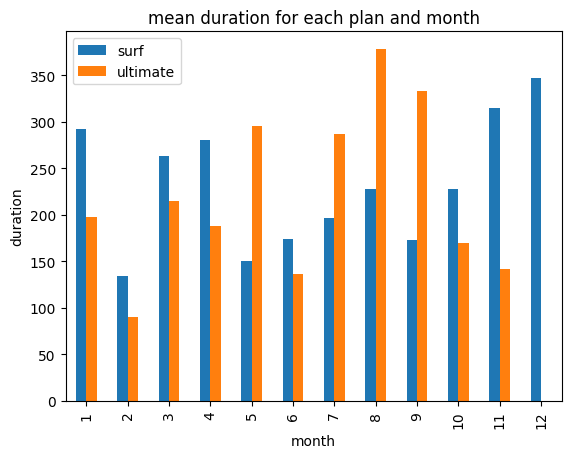

In [45]:
mean.plot(kind='bar', title='mean duration for each plan and month', x='month', ylabel='duration')
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 2) </b> <a class="tocSkip"></a>

Veo que ahora el eje x corresponde ya al mes, en esta ocasión me parece que olvidaste el nombre dle eje y.

<div class="alert alert-block alert-warning">
<b>Comentario del revisor. (Iteración 1) </b> <a class="tocSkip"></a>

Cuidado Estela! Tuviste un error a la hora de nombrar los ejes de este gráfico. Me parece que están intercambiados. Además te recomiendo graficar por plan, para poder visualizar como se comportan cada uno.

In [46]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.



In [47]:
min_surf = surf.groupby(['month'])['duration'].sum().reset_index()

min_ultimate = ultimate.groupby(['month'])['duration'].sum().reset_index()
min_ultimate.drop(['month'], axis=1, inplace=True)

min_month = pd.concat([min_surf, min_ultimate], axis=1)
min_month.columns=['month','surf', 'ultimate']
min_month

,month,surf,ultimate
0,1,292,593.0
1,2,402,90.0
2,3,1319,1077.0
3,4,3082,751.0
4,5,751,2959.0
5,6,1389,544.0
6,7,1963,1436.0
7,8,3183,2270.0
8,9,1898,2333.0
9,10,5010,1016.0


<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 2) </b> <a class="tocSkip"></a>

Se ve muy bien!

<div class="alert alert-block alert-warning">
<b>Comentario del revisor. (Iteración 1) </b> <a class="tocSkip"></a>

Creo que aquí querías llamar al dataframe incomes_by_user que definiste atrás.

array([[<AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'surf'}>],
       [<AxesSubplot:title={'center':'ultimate'}>, <AxesSubplot:>]],
      dtype=object)

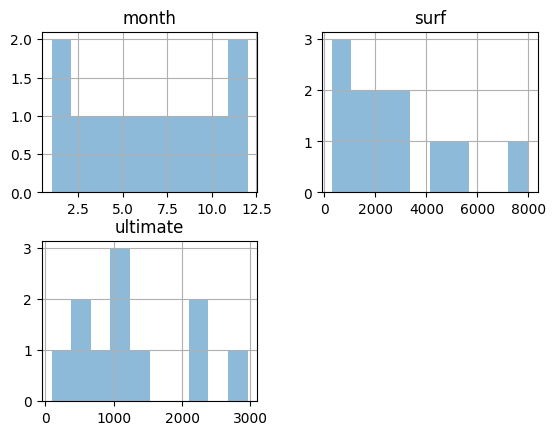

In [48]:
min_month.hist(bins=10, alpha=0.5)

<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 2) </b> <a class="tocSkip"></a>

Los gráficos ya están, recuerda ir haciendo anotaciones de lo que vas viendo y concluyendo de cada uno de ellos.

<div class="alert alert-block alert-warning">
<b>Comentario del revisor. (Iteración 1) </b> <a class="tocSkip"></a>

Una vez que hayas corregido el problema con el dataframe incomes_by_user, este en automático arrojará un gráfico.

[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [49]:
print(min_month.mean())
print(np.var(min_month))
# Calcula la media y la varianza de la duración mensual de llamadas.



month          6.500000
surf        2666.416667
ultimate    1278.363636
dtype: float64
month       1.191667e+01
surf        4.785726e+06
ultimate    7.122851e+05
dtype: float64


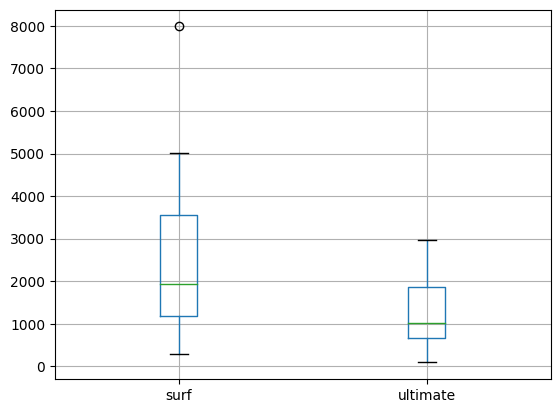

In [50]:
min_month.boxplot(['surf', 'ultimate'])
plt.show()    # Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas



<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 3) </b> <a class="tocSkip"></a>

Perfecto! Ahora se ve mucho mejor!

<div class="alert alert-block alert-warning">
<b>Comentario del revisor. (Iteración 2) </b> <a class="tocSkip"></a>

No olvides quitar la variable month al graficar el boxplot. En esta ocasión solo nos interesa graficar el comportamiento de surf y ultimate para poder compararlos.

<div class="alert alert-block alert-warning">
<b>Comentario del revisor. (Iteración 1) </b> <a class="tocSkip"></a>

Mucho cuidado Estela, no deberías de graficar un box plot para los id, estos son identificadores, no tienen ninguna información que pueda aportar al análisis.

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan?]


las personas que tienen plan ultimate hacen menos llamadas que las que tienen un plan surf, estos también puede ser debido a que más usuarios tienen el plan surf, esto puede sesgar los datos. 

### Mensajes

In [51]:
messages_sent = incomes_by_user.groupby(['user_id', 'plan', 'month',])['id_y'].sum().reset_index()
print(messages_sent)# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan

mean_s_messages = surf.groupby(['month'])['id_y'].mean().reset_index()


mean_u_messages = ultimate.groupby(['month'])['id_y'].mean().reset_index()
mean_u_messages.drop(['month'], axis=1, inplace=True)


mean_messages = pd.concat([mean_s_messages, mean_u_messages], axis=1)
mean_messages.columns=['month', 'surf', 'ultimate']
mean_messages

     user_id      plan  month  id_y
0       1000  ultimate     12    11
1       1001      surf      8    30
2       1002      surf     10    15
3       1004      surf      5     7
4       1006  ultimate     11    15
..       ...       ...    ...   ...
181     1479      surf     11     1
182     1480      surf     12    51
183     1481      surf     12     3
184     1486      surf     12    10
185     1497  ultimate     12    50

[186 rows x 4 columns]


,month,surf,ultimate
0,1,21.000000,20.666667
1,2,7.000000,8.000000
2,3,19.000000,30.000000
3,4,28.272727,23.000000
4,5,8.800000,32.300000
5,6,17.500000,10.750000
6,7,19.100000,34.800000
7,8,27.285714,30.000000
8,9,13.727273,22.285714
9,10,27.954545,21.666667


<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 2) </b> <a class="tocSkip"></a>

Perfecto! 

<div class="alert alert-block alert-warning">
<b>Comentario del revisor. (Iteración 1) </b> <a class="tocSkip"></a>

Creo que aquí querías llamar al dataframe incomes_by_user que definiste atrás.

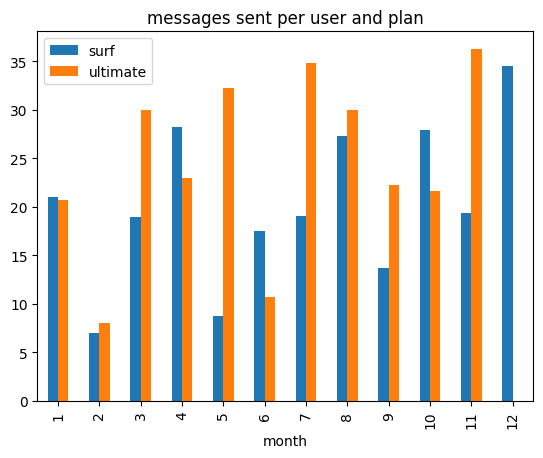

In [52]:
mean_messages.plot(kind='bar', title='messages sent per user and plan', x='month')
plt.show()



array([[<AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'surf'}>],
       [<AxesSubplot:title={'center':'ultimate'}>, <AxesSubplot:>]],
      dtype=object)

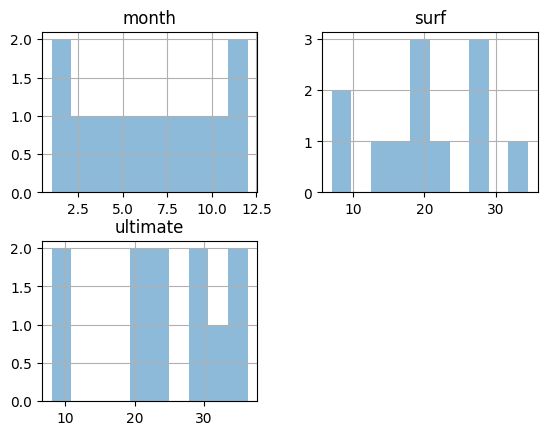

In [53]:
mean_messages.hist(bins=10, alpha=0.5)

In [54]:
print(mean_messages.mean())
print(np.var(mean_messages))

month        6.500000
surf        20.291278
ultimate    24.523160
dtype: float64
month       11.916667
surf        61.495732
ultimate    77.955904
dtype: float64


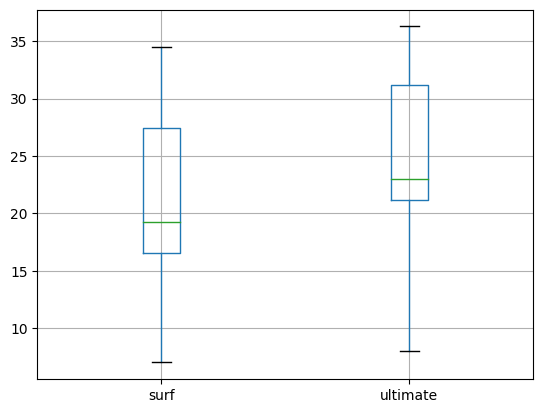

In [55]:
mean_messages.boxplot(['surf', 'ultimate'])
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 3) </b> <a class="tocSkip"></a>

Muy bien!

<div class="alert alert-block alert-warning">
<b>Comentario del revisor. (Iteración 2) </b> <a class="tocSkip"></a>

No olvides quitar la variable month al graficar el boxplot. En esta ocasión solo nos interesa graficar el comportamiento de surf y ultimate para poder compararlos.

<div class="alert alert-block alert-warning">
<b>Comentario del revisor. (Iteración 1) </b> <a class="tocSkip"></a>

Te recomiendo corregir el error del dataframe incomes_by_user y con eso se podrán visualizar los gráficos correctos!

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a los mensajes. ¿Su comportamiento varía en función del plan?]

los usuarios que tienen el plan ultimate envian mucho más mensajes que los que tienen surf. 

### Internet

In [56]:
intenet_s = surf.groupby(['user_id'])['mb_used'].sum().reset_index()


internet_u = ultimate.groupby(['user_id'])['mb_used'].sum().reset_index()
internet_u.drop(['user_id'], axis=1, inplace=True)
mean_u

internet_used = pd.concat([intenet_s, internet_u], axis=1)
internet_used.columns=['user_id', 'surf', 'ultimate']
internet_used

# Compara la cantidad de tráfico de Internet consumido por usuarios por plan

,user_id,surf,ultimate
0,1001,6919.15,1901.47
1,1002,6552.01,2068.37
2,1004,6547.21,20113.92
3,1014,1175.59,4822.35
4,1015,17495.12,10653.04
...,...,...,...
123,1474,5336.52,NaN
124,1479,4123.18,NaN
125,1480,8805.51,NaN
126,1481,1265.78,NaN


<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 3) </b> <a class="tocSkip"></a>

de acuerdo!

<div class="alert alert-block alert-warning">
<b>Comentario del revisor. (Iteración 2) </b> <a class="tocSkip"></a>

Está perfecto haber agregado este gráfico, sin embargo siempre hay que intentar hacerlos lo más legibles posibles, por ejemplo si te interesa graficar el comportamiento de cada user, puedes optar por graficar el top 10.  O realizar un histograma.

array([[<AxesSubplot:title={'center':'user_id'}>,
        <AxesSubplot:title={'center':'surf'}>],
       [<AxesSubplot:title={'center':'ultimate'}>, <AxesSubplot:>]],
      dtype=object)

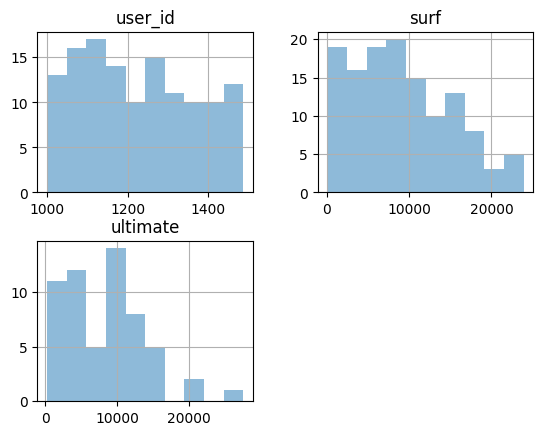

In [57]:
internet_used.hist(bins=10, alpha=0.5)

In [58]:
print(internet_used.mean())
print(np.var(internet_used))

user_id     1226.460938
surf        9241.557187
ultimate    8654.625172
dtype: float64
user_id     1.969540e+04
surf        3.640243e+07
ultimate    3.103794e+07
dtype: float64


[Elabora las conclusiones sobre cómo los usuarios tienden a consumir el tráfico de Internet. ¿Su comportamiento varía en función del plan?]

los usuarios que tienen el plan surf, suelen consumir más intenet que los usuarios con ultimatum. Sin embargo el promedio de consumo de los usuarios surf no excede a lo ya incluido en el plan, aunque podemos también observar que la media esta sesigada por valores máximos muy altos. Se les podría hacer una invitacióin a los que consumen mucho más de considerar cambiarse al plan ultimatum

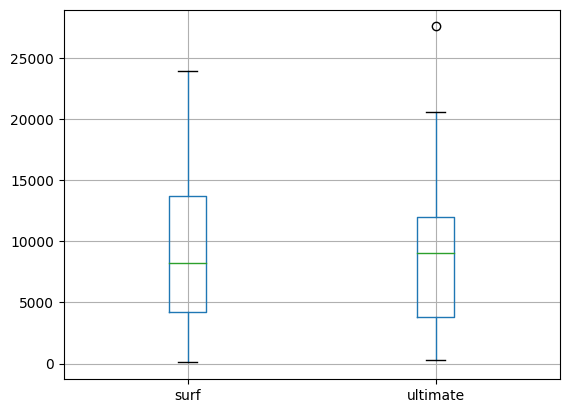

In [59]:
internet_used.boxplot(['surf', 'ultimate'])
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 3) </b> <a class="tocSkip"></a>

Perfecto Estela!

<div class="alert alert-block alert-warning">
<b>Comentario del revisor. (Iteración 2) </b> <a class="tocSkip"></a>

No olvides quitar la variable month al graficar el boxplot. En esta ocasión solo nos interesa graficar el comportamiento de surf y ultimate para poder compararlos.

<div class="alert alert-block alert-warning">
<b>Comentario del revisor. (Iteración 1) </b> <a class="tocSkip"></a>

Te recomiendo corregir el error del dataframe incomes_by_user y con eso se podrán visualizar los gráficos correctos!

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

In [66]:
incomes_s = surf.groupby(['month'])['incomes'].sum().reset_index()


incomes_u = ultimate.groupby(['month'])['incomes'].sum().reset_index()
incomes_u.drop(['month'], axis=1, inplace=True)


plans_behavior = pd.concat([incomes_s, incomes_u], axis=1)
plans_behavior.columns=['month','surf', 'ultimate']

plans_behavior


,month,surf,ultimate
0,1,78817.90,145597.20
1,2,239253.70,34686.33
2,3,446888.20,327454.54
3,4,977238.06,212093.77
4,5,303094.20,679760.83
5,6,872735.00,167939.94
6,7,1111357.68,261854.11
7,8,1244653.04,472110.87
8,9,816368.60,477610.63
9,10,1903151.08,222527.06


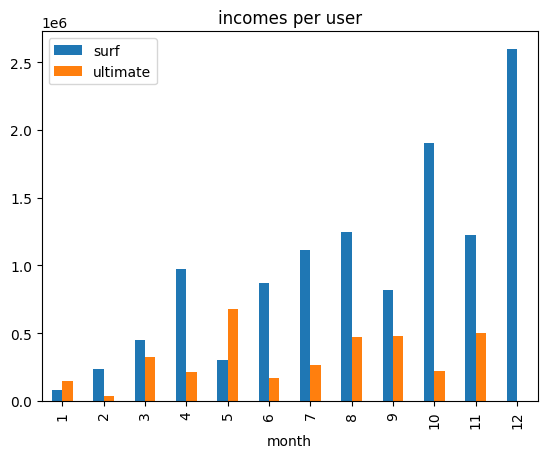

In [67]:
plans_behavior.plot(kind='bar', title='incomes per user', x='month')
plt.show()

array([[<AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'surf'}>],
       [<AxesSubplot:title={'center':'ultimate'}>, <AxesSubplot:>]],
      dtype=object)

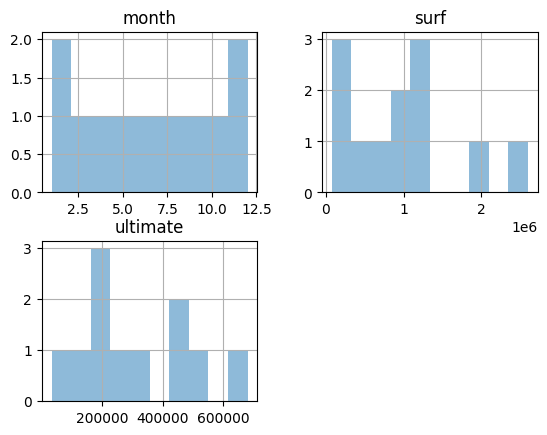

In [68]:
plans_behavior.hist(bins=10, alpha=0.5)

In [69]:
print(plans_behavior.mean())
print(np.var(plans_behavior))

month            6.500000
surf        984386.303333
ultimate    318696.165455
dtype: float64
month       1.191667e+01
surf        4.795327e+11
ultimate    3.370691e+10
dtype: float64


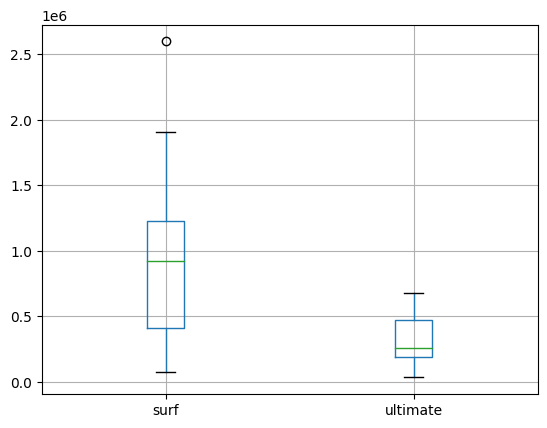

In [71]:
plans_behavior.boxplot(['surf', 'ultimate'])
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 3) </b> <a class="tocSkip"></a>

Muy bien!!!

<div class="alert alert-block alert-warning">
<b>Comentario del revisor. (Iteración 2) </b> <a class="tocSkip"></a>

No olvides quitar la variable month al graficar el boxplot. En esta ocasión solo nos interesa graficar el comportamiento de surf y ultimate para poder compararlos.

<div class="alert alert-block alert-warning">
<b>Comentario del revisor. (Iteración 1) </b> <a class="tocSkip"></a>

Te recomiendo corregir el error del dataframe incomes_by_user y con eso se podrán visualizar los gráficos correctos!


[Elabora las conclusiones sobre cómo difiere el ingreso entre los planes.]

los ingresos de los usurios que tienen el plan surf, son considerablemente mayores que los de ultimate. Esto puede ser a que hay mayor cantidad de clientes con el plan surf y aparte que al tener menos minutos, internet y mensajes se exceden más y tienen que pagar más de su tarifa inicial. 

## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [66]:
plans_mean = incomes_by_user.groupby('plan')['incomes'].mean().reset_index()
plans_mean

,plan,incomes
0,surf,92286.215937
1,ultimate,60442.376207


In [67]:


alpha = 0.05

ingresos_ultimate= incomes_by_user[incomes_by_user['plan']=='ultimate']['incomes']
ingresos_surf= incomes_by_user[incomes_by_user['plan']=='surf']['incomes']

results = st.ttest_ind(ingresos_ultimate, ingresos_surf, equal_var = True)


print('valor p: ', results.pvalue)

if results.pvalue < alpha: 
        print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")# Prueba las hipótesis



valor p:  0.0003224267153389843
Rechazamos la hipótesis nula


Rechazar la hipotesis nula quiere decir que si hay diferencia entre el promedio de llamadas de los dos planes

Index(['user_id', 'first_name', 'last_name', 'age', 'city', 'reg_date', 'plan',
       'churn_date', 'month'],
      dtype='object')

<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 3) </b> <a class="tocSkip"></a>

Exacto! Una interpretación del resultado del test ayuda más a los interesados del problema

<div class="alert alert-block alert-warning">
<b>Comentario del revisor. (Iteración 2) </b> <a class="tocSkip"></a>

Perfecto! El test se ve bien. Te recomiendo indagar más en la conclusión ¿Qué significa rechazar la hipótesis nula?

<div class="alert alert-block alert-warning">
<b>Comentario del revisor. (Iteración 1) </b> <a class="tocSkip"></a>

Dos sugerencias en este punto: La primera, si ya tienes plans_mean, usa eso dentro de las variables surf_mean y ultimate_mean mediante el uso de los índices. Ahora, por otro lado, cuando calculas un test t de student, lo debes realizar sobre los datos no sobre el promedio:
    
    ingresos_ultimate= user_info[user_info['plan_name']=='ultimate']['total_cost']
    ingresos_surf= user_info[user_info['plan_name']=='surf']['total_cost']
    results = st.ttest_ind(ingresos_ultimate, ingresos_surf, equal_var = True)
    
De esta forma el test, compara los dos promedios. 

[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [70]:
city_merge = incomes_by_user.merge(users, on = 'user_id', how='inner')# Añade la información de la tarifa
city_merge
# Prueba las hipótesis



,user_id,month_x,id_x,duration,id_y,mb_used,plan_x,messages_included,mb_per_month_included,minutes_included,...,plan_name,incomes,first_name,last_name,age,city,reg_date,plan_y,churn_date,month_y
0,1000,12,16,124,11,1901.47,ultimate,1000,30720,3000,...,ultimate,13170.29,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,12
1,1006,11,2,10,15,2068.37,ultimate,1000,30720,3000,...,ultimate,14338.59,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,11
2,1013,12,35,219,16,20113.92,ultimate,1000,30720,3000,...,ultimate,140657.44,Nicolas,Snider,50,"Knoxville, TN MSA",2018-12-01,ultimate,NaT,12
3,1026,7,23,163,9,4822.35,ultimate,1000,30720,3000,...,ultimate,33616.45,Meggan,Hamilton,49,"Houston-The Woodlands-Sugar Land, TX MSA",2018-07-20,ultimate,NaT,7
4,1031,7,36,304,1,10653.04,ultimate,1000,30720,3000,...,ultimate,74431.28,Lane,Martin,52,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-07-15,ultimate,NaT,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,1474,8,11,96,6,5336.52,surf,50,15360,500,...,surf,53235.20,Randee,Carpenter,26,"Bakersfield, CA MSA",2018-08-26,surf,NaT,8
182,1479,11,83,574,1,4123.18,surf,50,15360,500,...,surf,41104.02,Keesha,Burnett,44,"Riverside-San Bernardino-Ontario, CA MSA",2018-11-12,surf,NaT,11
183,1480,12,70,541,51,8805.51,surf,50,15360,500,...,surf,87926.36,Jasper,Buchanan,46,"St. Louis, MO-IL MSA",2018-12-13,surf,NaT,12
184,1481,12,6,36,3,1265.78,surf,50,15360,500,...,surf,12527.80,Roni,Frye,32,"Urban Honolulu, HI MSA",2018-12-27,surf,NaT,12


In [71]:
city_merge['city'].unique()

array(['Atlanta-Sandy Springs-Roswell, GA MSA',
       'San Francisco-Oakland-Berkeley, CA MSA', 'Knoxville, TN MSA',
       'Houston-The Woodlands-Sugar Land, TX MSA',
       'New York-Newark-Jersey City, NY-NJ-PA MSA',
       'Chicago-Naperville-Elgin, IL-IN-WI MSA',
       'Charlotte-Concord-Gastonia, NC-SC MSA',
       'Phoenix-Mesa-Chandler, AZ MSA', 'Grand Rapids-Kentwood, MI MSA',
       'Cincinnati, OH-KY-IN MSA',
       'Miami-Fort Lauderdale-West Palm Beach, FL MSA',
       'Las Vegas-Henderson-Paradise, NV MSA',
       'Los Angeles-Long Beach-Anaheim, CA MSA',
       'San Antonio-New Braunfels, TX MSA',
       'San Diego-Chula Vista-Carlsbad, CA MSA',
       'Austin-Round Rock-Georgetown, TX MSA',
       'Minneapolis-St. Paul-Bloomington, MN-WI MSA',
       'Oklahoma City, OK MSA',
       'Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA',
       'Baton Rouge, LA MSA', 'Detroit-Warren-Dearborn, MI MSA',
       'Birmingham-Hoover, AL MSA', 'Charleston-North Charleston, SC MSA'

In [80]:
ny = city_merge[city_merge['city']== 'New York-Newark-Jersey City, NY-NJ-PA MSA'].incomes
ny

4       74431.28
5       69100.01
10      49978.18
12      36326.99
14      95726.47
18      57232.21
39      29202.46
45      66572.24
48       1890.42
61      11625.90
68       9844.20
70      91657.50
74      65592.30
88       5867.80
90      75596.30
95     233698.30
96      77439.30
101     19770.20
103    116484.60
107    174194.65
110    124403.00
113    118166.93
114     79569.80
118    110199.06
137    116170.50
139     48486.70
155     40410.10
159     16760.10
171     67570.10
172    219430.78
173    159993.80
Name: incomes, dtype: float64

In [79]:
others = city_merge[city_merge['city'] != 'New York-Newark-Jersey City, NY-NJ-PA MSA'].incomes
others

0       13170.29
1       14338.59
2      140657.44
3       33616.45
6       25567.36
         ...    
181     53235.20
182     41104.02
183     87926.36
184     12527.80
185    202998.30
Name: incomes, Length: 155, dtype: float64

In [74]:
ny_mean = ny['incomes'].mean()
others_mean = others['incomes'].mean()

In [75]:
ny_var = ny['incomes'].var()
others_var = others['incomes'].var()

In [76]:
if ny_var == others_var:
    variance =True
else:
    variance=False
variance

False

In [77]:
ny.isnull().sum()


user_id                   0
month_x                   0
id_x                      0
duration                  0
id_y                      0
mb_used                   0
plan_x                    0
messages_included         0
mb_per_month_included     0
minutes_included          0
usd_monthly_pay           0
usd_per_gb                0
usd_per_message           0
usd_per_minute            0
plan_name                 0
incomes                   0
first_name                0
last_name                 0
age                       0
city                      0
reg_date                  0
plan_y                    0
churn_date               29
month_y                   0
dtype: int64

In [81]:


alpha = 0.05 # indica el nivel de significación estadística

results = st.ttest_ind(ny, others, equal_var=variance, nan_policy='omit')

print('valor p:', results.pvalue)

if results.pvalue < alpha: # compara el valor obtenido y el nivel crítico de significación estadística
    # y verifica si la media muestral está en el lado correcto del interested_value):
    print(
        "Rechazamos la hipótesis nula: los ingresos fueron significativamente inferiores a 800 dólares"
    )
else:
    print(
        "No podemos rechazar la hipótesis nula: los ingresos no fueron significativamente inferiores"
    )

valor p: 0.7641409723520617
No podemos rechazar la hipótesis nula: los ingresos no fueron significativamente inferiores


<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 3) </b> <a class="tocSkip"></a>

Perfecto!

<div class="alert alert-block alert-warning">
<b>Comentario del revisor. (Iteración 2) </b> <a class="tocSkip"></a>

Mira Estela, estás obteniendo como pval un nulo, significa que algo no está del todo correcto. Intenta resolverlo, tu puedes!

<div class="alert alert-block alert-warning">
<b>Comentario del revisor. (Iteración 1) </b> <a class="tocSkip"></a>

Ten cuidado acá al contrario del test anterior, estas metiendo un dataframe completo en el test y solo debería ser sobre una columna.

## Conclusión general

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.]


podemos observar en la comparación de cada plan quu en cuanto a llamadas, surf supera a ultimate, pero en mensages y uno se internet, ultimate supera a surf. Lo cual es de esperarse, ya que deben contrarlo sabiendo que ocuparan más estos servicios. Pero en cuanto a ls ingresos, son mayores los que entran de los usuarios con el plan surf que por los de ultimate. Aunque la prueba de hipostesis rechaza que sean diferentes. 

por otro lado, la prueba de hipotesis de que los ingresos de NY y NJ son mayores a las otras areas no pudo rechazarse. 

<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 2) </b> <a class="tocSkip"></a>

Te felicito! Esta vez colocaste tus conclusiones y muy atinadas por cierto!

<div class="alert alert-block alert-warning">
<b>Comentario del revisor. (Iteración 1) </b> <a class="tocSkip"></a>

Tal vez se te pasó. Pero es muy importante ir agragando los principales insights que vamos observando del análisis, pero principalmente, la conclusión general debe ser un resumen de los hallazgos más importantes que hemos detectado a lo largo de nuestro análisis.